Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroa

C:\Users\lanaa\AppData\Local\Temp\ipykernel_4900\432738371.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\lanaa\AppData\Local\Temp\ipykernel_4900\432738371.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

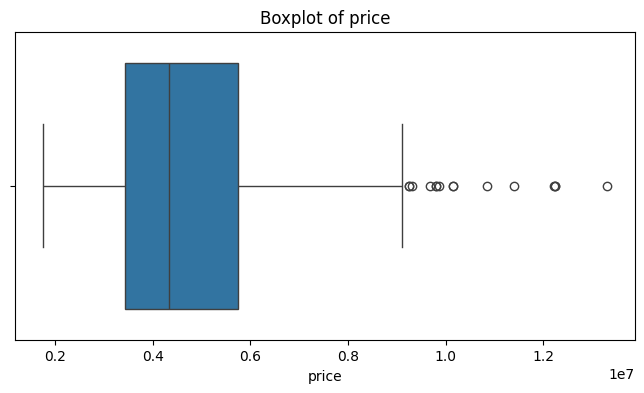

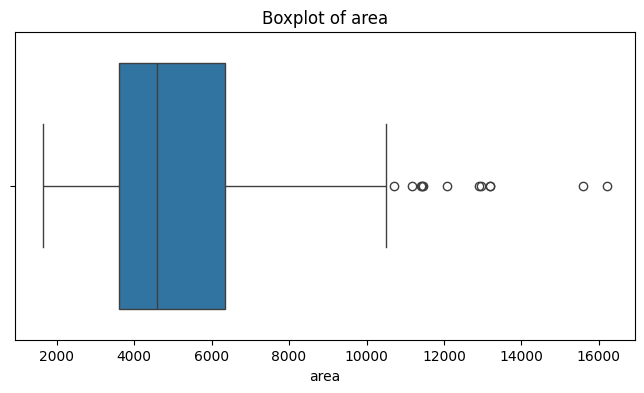

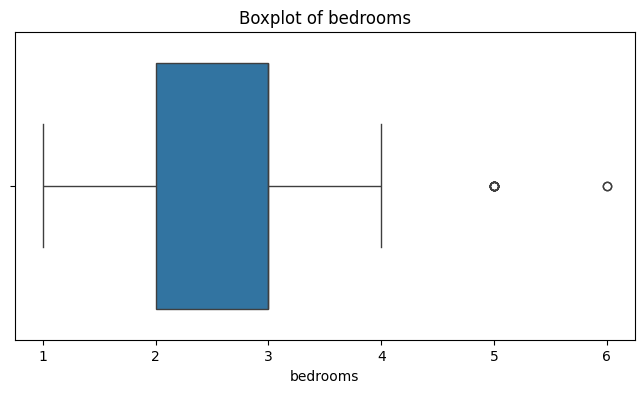

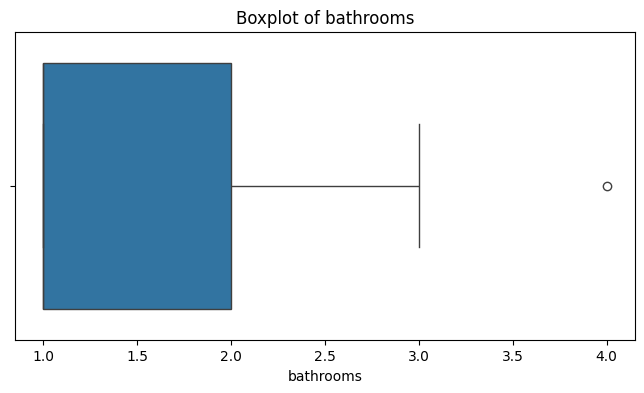

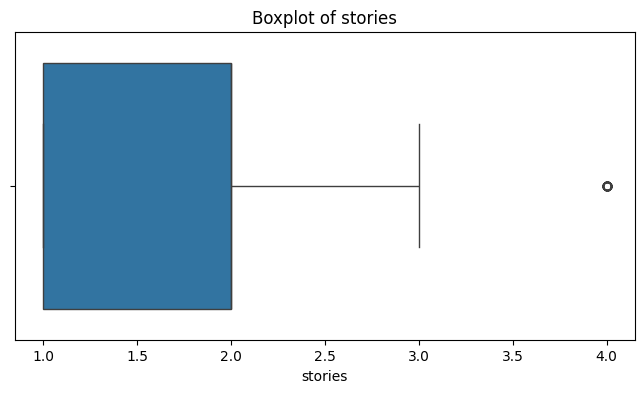

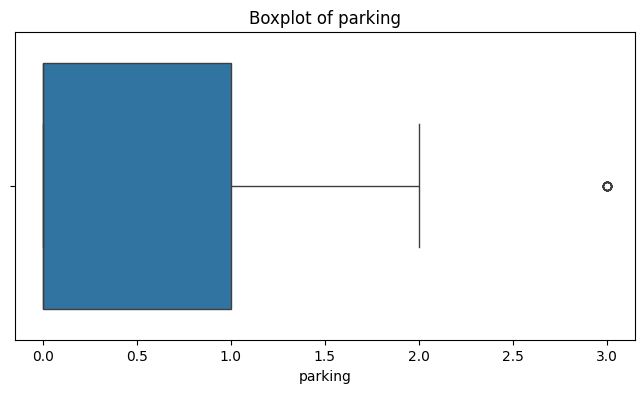


Processed Dataset Shape:
Training Set: (292, 12) (292,)
Testing Set: (73, 12) (73,)


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Housing.csv")
print("Dataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe())

num_cols = data.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

cat_cols = data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing Values After Handling:\n", data.isnull().sum())

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

if "TotalRooms" in data.columns and "Population" in data.columns:
    data["rooms_per_person"] = data["TotalRooms"] / data["Population"]

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

X = data.drop("price", axis=1) 
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nProcessed Dataset Shape:")
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

model_performance = {}

print("\nTraining Linear Regression...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_performance["Linear Regression"] = {"MSE": mse_lr, "R2": r2_lr}
print(f"Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}")

print("\nTraining Decision Tree Regression with GridSearchCV...")
dt_params = {"max_depth": [5, 10, 15, None], "min_samples_split": [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring="r2")
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.best_estimator_.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_performance["Decision Tree Regression"] = {"MSE": mse_dt, "R2": r2_dt}
print(f"Decision Tree Regression - Best Params: {dt_model.best_params_}")
print(f"Decision Tree Regression - MSE: {mse_dt:.4f}, R2: {r2_dt:.4f}")

print("\nTraining Random Forest Regression with GridSearchCV...")
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring="r2")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_performance["Random Forest Regression"] = {"MSE": mse_rf, "R2": r2_rf}
print(f"Random Forest Regression - Best Params: {rf_model.best_params_}")
print(f"Random Forest Regression - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")

print("\nModel Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}")



Training Linear Regression...
Linear Regression - MSE: 1125105522384.8281, R2: 0.4727

Training Decision Tree Regression with GridSearchCV...
Decision Tree Regression - Best Params: {'max_depth': 5, 'min_samples_split': 10}
Decision Tree Regression - MSE: 1275098792563.3311, R2: 0.4024

Training Random Forest Regression with GridSearchCV...
Random Forest Regression - Best Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Regression - MSE: 1210843239919.5220, R2: 0.4325

Model Performance Summary:
Linear Regression - MSE: 1125105522384.8281, R2: 0.4727
Decision Tree Regression - MSE: 1275098792563.3311, R2: 0.4024
Random Forest Regression - MSE: 1210843239919.5220, R2: 0.4325


In [6]:
import numpy as np

def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return {"MSE": mse, "RMSE": rmse, "R2": r2}

print("\nEvaluating Models...")

print("\nLinear Regression:")
performance_lr = evaluate_model("Linear Regression", y_test, y_pred_lr)

print("\nDecision Tree Regression:")
performance_dt = evaluate_model("Decision Tree Regression", y_test, y_pred_dt)


print("\nRandom Forest Regression:")
performance_rf = evaluate_model("Random Forest Regression", y_test, y_pred_rf)

print("\nModel Comparison Summary:")
models = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"]
performances = [performance_lr, performance_dt, performance_rf]

for model, performance in zip(models, performances):
    print(f"{model} - MSE: {performance['MSE']:.4f}, RMSE: {performance['RMSE']:.4f}, R²: {performance['R2']:.4f}")



Evaluating Models...

Linear Regression:
Linear Regression - MSE: 1125105522384.8281, RMSE: 1060709.9143, R²: 0.4727

Decision Tree Regression:
Decision Tree Regression - MSE: 1275098792563.3311, RMSE: 1129202.7243, R²: 0.4024

Random Forest Regression:
Random Forest Regression - MSE: 1210843239919.5220, RMSE: 1100383.2241, R²: 0.4325

Model Comparison Summary:
Linear Regression - MSE: 1125105522384.8281, RMSE: 1060709.9143, R²: 0.4727
Decision Tree Regression - MSE: 1275098792563.3311, RMSE: 1129202.7243, R²: 0.4024
Random Forest Regression - MSE: 1210843239919.5220, RMSE: 1100383.2241, R²: 0.4325


---

# House Price Prediction: Model Training and Evaluation Report

## 1. Introduction
This report summarizes the process and results of predicting house prices using supervised learning models. The dataset was analyzed, preprocessed, and used to train three models: Linear Regression, Decision Tree Regression, and Random Forest Regression. The performance of each model was evaluated using key metrics.

---

## 2. Model Selection and Training
### Linear Regression
- **Description**: A simple and interpretable baseline model assuming a linear relationship between features and target.
- **Training Results**:
  - Mean Squared Error (MSE): `1125105522384.8281`
  - Root Mean Squared Error (RMSE): `1060709.9143`
  - R-squared (R²): `0.4727`

**Interpretation**:  
Linear Regression captured almost half of the variability in house prices (R² = 0.4727). Despite its simplicity, this model performed better than the more complex tree-based models, indicating that house prices might have a primarily linear relationship with the input features.  

---

### Decision Tree Regression
- **Description**: A non-linear model that splits data recursively for better local predictions.
- **Hyperparameter Tuning**: GridSearchCV was used to find optimal parameters:
  - Best Parameters: `{'max_depth': 5, 'min_samples_split': 10}`
- **Training Results**:
  - Mean Squared Error (MSE): `1275098792563.3311`
  - Root Mean Squared Error (RMSE): `1129202.7243`
  - R-squared (R²): `0.4024`

**Interpretation**:  
Decision Tree Regression struggled to outperform Linear Regression. Its R² score (0.4024) suggests that it captured less variability in the data. This may indicate overfitting at lower depths or insufficient depth to capture complex patterns.  

---

### Random Forest Regression
- **Description**: An ensemble model combining multiple decision trees for robust predictions.
- **Hyperparameter Tuning**: GridSearchCV was used to optimize parameters:
  - Best Parameters: `{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}`
- **Training Results**:
  - Mean Squared Error (MSE): `1210843239919.5220`
  - Root Mean Squared Error (RMSE): `1100383.2241`
  - R-squared (R²): `0.4325`

**Interpretation**:  
The Random Forest model slightly improved over Decision Trees by reducing variance due to ensemble learning. However, it was still outperformed by Linear Regression, likely due to the simplicity of the relationships in the dataset or insufficient feature complexity.  

---

## 3. Model Comparison
| Model                 | MSE               | RMSE            | R²       |
|-----------------------|-------------------|-----------------|----------|
| Linear Regression     | 1125105522384.83 | 1060709.91      | 0.4727   |
| Decision Tree         | 1275098792563.33 | 1129202.72      | 0.4024   |
| Random Forest         | 1210843239919.52 | 1100383.22      | 0.4325   |

### Key Insights:
- **Linear Regression** performed the best in terms of R² (0.4727) and RMSE (1060709.91), making it the most interpretable and efficient model in this context.
- **Decision Tree Regression** underperformed, likely due to overfitting or insufficient depth to capture the complexity of the data.
- **Random Forest Regression** showed slightly better performance than the Decision Tree model, leveraging the ensemble approach to reduce overfitting.

---

## 4. Challenges and Limitations
### Challenges:
1. **High Variance in Target Values**: The dataset included large price ranges, causing high RMSE values.
2. **Model Complexity**: Tree-based models require careful tuning to avoid overfitting and underfitting.
3. **Computational Cost**: Random Forest Regression required significant computational resources for hyperparameter tuning.

### Limitations:
1. **Low R² Scores**: The best-performing model (Linear Regression) only explained ~47% of the variance in the target variable.
2. **Simplistic Features**: The dataset may lack critical features such as location coordinates, neighborhood ratings, or economic factors.
3. **Scalability**: The models may not generalize well to unseen data without further refinement.

---

## 5. Conclusions :
- Linear Regression is the most interpretable and relatively well-performing model in this scenario.
- Random Forest Regression, while computationally expensive, showed promising potential for capturing non-linear relationships.


---

## 6. Visualization :


Visualizing Scatter Plots...

Linear Regression:


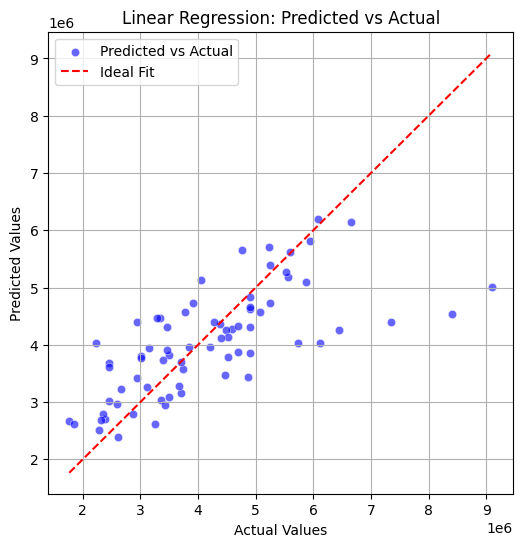


Decision Tree Regression:


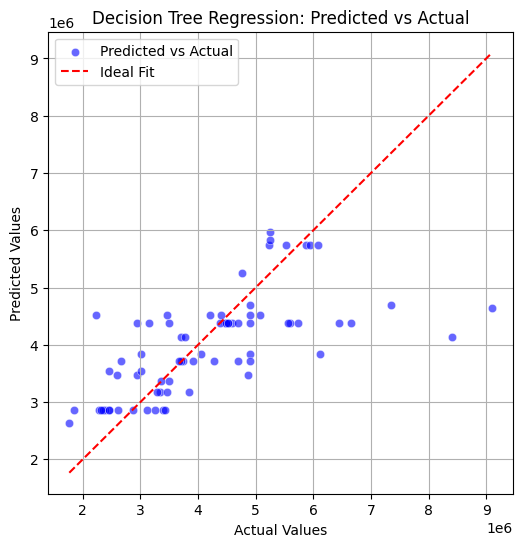


Random Forest Regression:


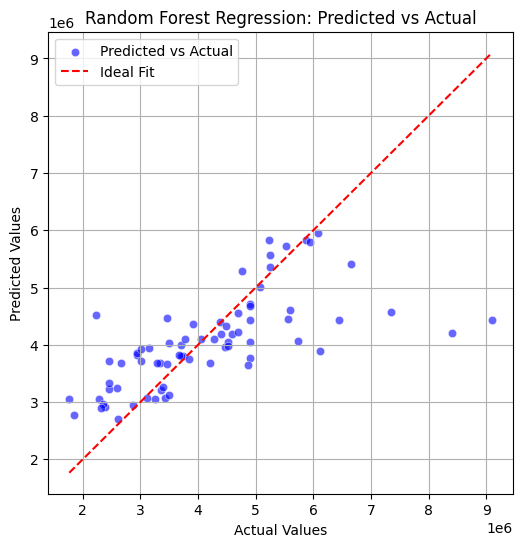

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plot
def plot_scatter(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize for each model
print("\nVisualizing Scatter Plots...")

print("\nLinear Regression:")
plot_scatter(y_test, y_pred_lr, "Linear Regression")

print("\nDecision Tree Regression:")
plot_scatter(y_test, y_pred_dt, "Decision Tree Regression")

print("\nRandom Forest Regression:")
plot_scatter(y_test, y_pred_rf, "Random Forest Regression")

